In [1]:
!pip install -U -q segmentation-models --user

from PIL import Image
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
!pip freeze

absl-py==0.15.0
accelerate==0.5.1
access==1.1.3
affine==2.3.0
aiobotocore==2.1.1
aiohttp @ file:///home/conda/feedstock_root/build_artifacts/aiohttp_1637087016127/work
aioitertools==0.10.0
aiosignal @ file:///home/conda/feedstock_root/build_artifacts/aiosignal_1636093929600/work
albumentations==1.1.0
alembic==1.7.6
allennlp==2.9.0
altair==4.2.0
annoy==1.17.0
ansiwrap==0.8.4
anyio @ file:///home/conda/feedstock_root/build_artifacts/anyio_1637703203932/work/dist
apache-beam==2.34.0
aplus==0.11.0
appdirs @ file:///home/conda/feedstock_root/build_artifacts/appdirs_1603108395799/work
argcomplete @ file:///home/conda/feedstock_root/build_artifacts/argcomplete_1619128689661/work
argon2-cffi @ file:///home/conda/feedstock_root/build_artifacts/argon2-cffi_1636021379047/work
arrow @ file:///home/conda/feedstock_root/build_artifacts/arrow_1635261338479/work
arviz==0.11.4
asgiref==3.5.0
asn1crypto @ file:///home/conda/feedstock_root/build_artifacts/asn1crypto_1595949944546/work
astropy==4.3.1
astu

In [128]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["SM_FRAMEWORK"] = "tf.keras"

import segmentation_models as sm
import matplotlib.pyplot as plt 
import tensorflow_io as tfio
import tensorflow as tf



exts = ('jpg', 'JPG', 'png', 'PNG', 'tif', 'gif', 'ppm')

In [129]:
print(tf. __version__) 
print(tfio. __version__)

2.6.2
0.21.0


# DRIVE

The dataset comes with pair of input retina image and target mask. Among all retina image, we will only use this dataset for a quick baseline. However, rest of the dataset can be replaces easily on this pipeline.


In [215]:
input_data = '/kaggle/input/dataset/new_data/new_data/train/image'
images = sorted(
    [
        os.path.join(input_data, fname)
        for fname in os.listdir(input_data)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)

images

['/kaggle/input/dataset/new_data/new_data/train/image/21_training_0.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_1.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_2.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_3.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_4.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/21_training_5.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_0.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_1.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_2.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_3.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_4.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/22_training_5.tif',
 '/kaggle/input/dataset/new_data/new_data/train/image/23_training_0.tif',
 '/kaggle/input/dataset/new_data/new_d

In [216]:
target_data = '/kaggle/input/dataset/new_data/new_data/train/mask'
masks = sorted(
    [
        os.path.join(target_data, fname)
        for fname in os.listdir(target_data)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)
masks

['/kaggle/input/dataset/new_data/new_data/train/mask/21_training_0.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_1.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_2.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_3.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_4.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/21_training_5.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_0.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_1.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_2.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_3.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_4.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/22_training_5.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mask/23_training_0.gif',
 '/kaggle/input/dataset/new_data/new_data/train/mas

In [217]:
print("Number of samples:", len(images), len(masks))
for input_path, target_path in zip(images[:10], masks[:10]):
    print(input_path[-31:], "|", target_path[-34:])

Number of samples: 120 120
a/train/image/21_training_0.tif | _data/train/mask/21_training_0.gif
a/train/image/21_training_1.tif | _data/train/mask/21_training_1.gif
a/train/image/21_training_2.tif | _data/train/mask/21_training_2.gif
a/train/image/21_training_3.tif | _data/train/mask/21_training_3.gif
a/train/image/21_training_4.tif | _data/train/mask/21_training_4.gif
a/train/image/21_training_5.tif | _data/train/mask/21_training_5.gif
a/train/image/22_training_0.tif | _data/train/mask/22_training_0.gif
a/train/image/22_training_1.tif | _data/train/mask/22_training_1.gif
a/train/image/22_training_2.tif | _data/train/mask/22_training_2.gif
a/train/image/22_training_3.tif | _data/train/mask/22_training_3.gif


In [218]:
from sklearn.model_selection import train_test_split
IMAGE_SIZE = 512
BATCH_SIZE = 8

def read_files(image_path, mask=False):
    image = tf.io.read_file(image_path)
    if mask:
        image = tf.io.decode_gif(image) # out: (1, h, w, 3)
        image = tf.squeeze(image) # out: (h, w, 3)
        image = tf.image.rgb_to_grayscale(image) # out: (h, w, 1)
        image = tf.divide(image, 128)
        image.set_shape([None, None, 1])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = tf.cast(image, tf.int32)
    else:
        image = tfio.experimental.image.decode_tiff(image) # out: (h, w, 4)
        image = image[:,:,:3] # out: (h, w, 3)
        image.set_shape([None, None, 3])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = image / 255.
    return image

def load_data(image_list, mask_list):
    image = read_files(image_list)
    mask  = read_files(mask_list, mask=True)
    return image, mask

def data_generator(image_list, mask_list):
    dataset = tf.data.Dataset.from_tensor_slices((image_list, mask_list))
    dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=False)
    return dataset

train_x, valid_x, train_y, valid_y = train_test_split(images, masks, test_size=0.1, random_state=42)
train_dataset = data_generator(train_x, train_y)
train_dataset
validation_dataset = data_generator(valid_x, valid_y)
validation_dataset

<BatchDataset shapes: ((None, 512, 512, 3), (None, 512, 512, 1)), types: (tf.float32, tf.int32)>

In [219]:
def visualize(**images):
    """PLot images in one row."""
    n = len(images) 
    plt.figure(figsize=(20, 20))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image, cmap='gray')
    plt.show()

(8, 512, 512, 3) (8, 512, 512, 1)
0 1
[0 1]


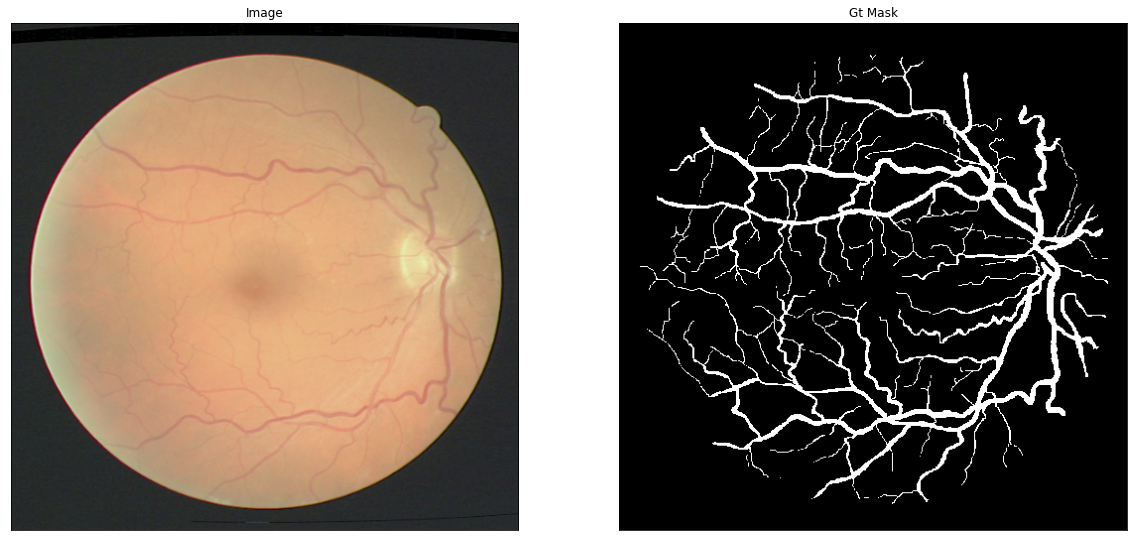

0 1
[0 1]


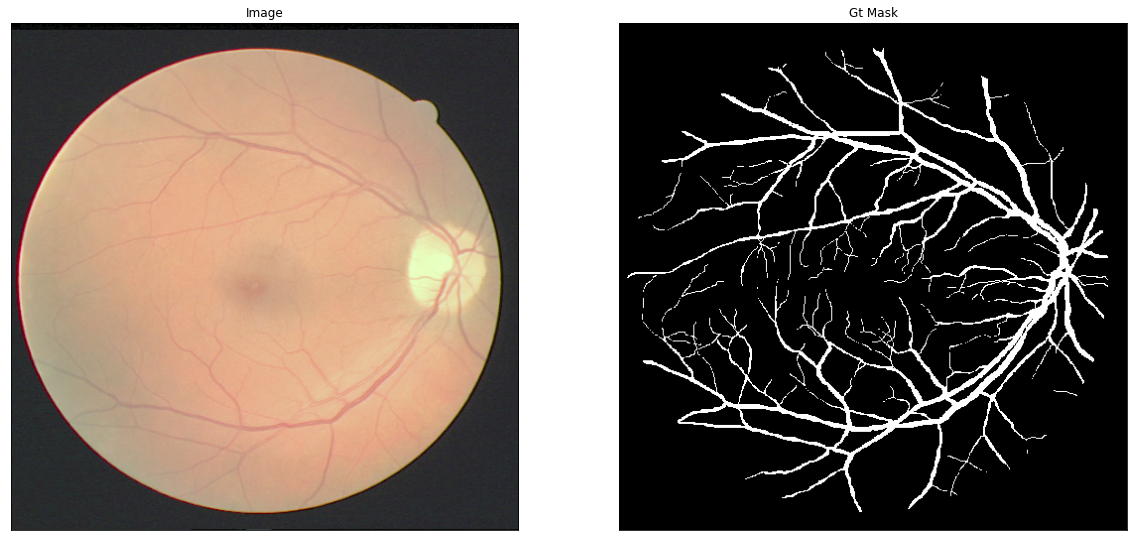

In [220]:
image, mask = next(iter(train_dataset.take(1))) 
print(image.shape, mask.shape)

for (img, msk) in zip(image[:2], mask[:2]):
    print(mask.numpy().min(), mask.numpy().max())
    print(np.unique(mask.numpy()))
    visualize(
        image=img.numpy(),
        gt_mask=msk.numpy(),
    )

# Model

In [221]:
from tensorflow import keras 

# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()

BACKBONE   = 'vgg19'
n_classes  = 1 
activation = 'sigmoid' 
model7 = sm.Unet(BACKBONE, classes=n_classes, activation=activation)
model7.summary(line_length=110)

Model: "model"
______________________________________________________________________________________________________________
Layer (type)                        Output Shape            Param #      Connected to                         
input_1 (InputLayer)                [(None, None, None, 3)] 0                                                 
______________________________________________________________________________________________________________
block1_conv1 (Conv2D)               (None, None, None, 64)  1792         input_1[0][0]                        
______________________________________________________________________________________________________________
block1_conv2 (Conv2D)               (None, None, None, 64)  36928        block1_conv1[0][0]                   
______________________________________________________________________________________________________________
block1_pool (MaxPooling2D)          (None, None, None, 64)  0            block1_conv2[0][0]      

# Callback : Monitoring Training Progress

In [223]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
class DisplayCallback(keras.callbacks.Callback):
    def __init__(self, dataset, epoch_interval=5):
        self.dataset = dataset
        self.epoch_interval = epoch_interval
    
    def display(self, display_list, extra_title=''):
        plt.figure(figsize=(15, 15))
        title = ['Input Image', 'True Mask', 'Predicted Mask']

        if len(display_list) > len(title):
            title.append(extra_title)

        for i in range(len(display_list)):
            plt.subplot(1, len(display_list), i+1)
            plt.title(title[i])
            plt.imshow(display_list[i], cmap='gray')
            plt.axis('off')
        plt.show()
        
    def create_mask(self, pred_mask):
        pred_mask = (pred_mask > 0.5).astype("int32")
        return pred_mask[0]
    
    def show_predictions(self, dataset, num=1):
        for image, mask in dataset.take(num):
            pred_mask = model7.predict(image)
            self.display([image[0], mask[0], self.create_mask(pred_mask)])
        
    def on_epoch_end(self, epoch, logs=None):
        if epoch and epoch % self.epoch_interval == 0:
            self.show_predictions(self.dataset)
            print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

In [224]:
import os

# Define the directory to save the model
save_directory = '/kaggle/Models/'  # Change this to your desired directory

# Create the directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)




In [225]:
# Define a callback to save the best model weights
checkpoint_callback = ModelCheckpoint(
    os.path.join(save_directory, "model7.h5"), monitor="val_loss", save_best_only=True, save_weights_only=True, verbose=1
)

# Define a callback for early stopping
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=10, verbose=1)

# Define your DisplayCallback with the dataset and interval
display_callback = DisplayCallback(dataset=validation_dataset, epoch_interval=5)

# Compile and Fit

Epoch 1/250
14/14 [==============================] - 16s 543ms/step - loss: 0.7014 - dice_coefficient: 0.1975 - accuracy: 0.6569 - val_loss: 0.5271 - val_dice_coefficient: 0.1743 - val_accuracy: 0.7579

Epoch 00001: val_loss improved from inf to 0.52709, saving model to /kaggle/Models/model7.h5
Epoch 2/250
14/14 [==============================] - 7s 516ms/step - loss: 0.5432 - dice_coefficient: 0.2390 - accuracy: 0.8758 - val_loss: 0.6837 - val_dice_coefficient: 0.1961 - val_accuracy: 0.6275

Epoch 00002: val_loss did not improve from 0.52709
Epoch 3/250
14/14 [==============================] - 7s 515ms/step - loss: 0.4621 - dice_coefficient: 0.2631 - accuracy: 0.9161 - val_loss: 0.7342 - val_dice_coefficient: 0.2152 - val_accuracy: 0.4564

Epoch 00003: val_loss did not improve from 0.52709
Epoch 4/250
14/14 [==============================] - 7s 514ms/step - loss: 0.3991 - dice_coefficient: 0.2872 - accuracy: 0.9276 - val_loss: 0.5365 - val_dice_coefficient: 0.2626 - val_accuracy: 0.59

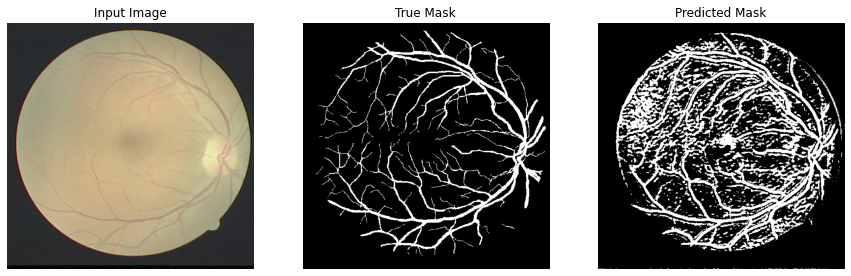


Sample Prediction after epoch 6

Epoch 7/250
14/14 [==============================] - 7s 518ms/step - loss: 0.3030 - dice_coefficient: 0.3341 - accuracy: 0.9468 - val_loss: 0.4124 - val_dice_coefficient: 0.3016 - val_accuracy: 0.8244

Epoch 00007: val_loss improved from 0.41260 to 0.41235, saving model to /kaggle/Models/model7.h5
Epoch 8/250
14/14 [==============================] - 7s 517ms/step - loss: 0.2854 - dice_coefficient: 0.3448 - accuracy: 0.9493 - val_loss: 0.3293 - val_dice_coefficient: 0.3159 - val_accuracy: 0.9395

Epoch 00008: val_loss improved from 0.41235 to 0.32935, saving model to /kaggle/Models/model7.h5
Epoch 9/250
14/14 [==============================] - 7s 516ms/step - loss: 0.2702 - dice_coefficient: 0.3558 - accuracy: 0.9511 - val_loss: 0.3859 - val_dice_coefficient: 0.3178 - val_accuracy: 0.8599

Epoch 00009: val_loss did not improve from 0.32935
Epoch 10/250
14/14 [==============================] - 7s 517ms/step - loss: 0.2568 - dice_coefficient: 0.3664 - acc

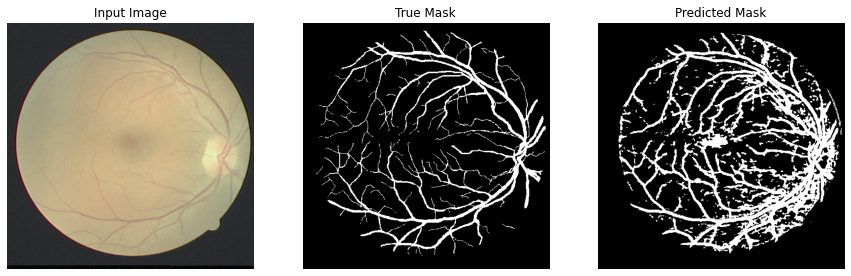


Sample Prediction after epoch 11

Epoch 12/250
14/14 [==============================] - 7s 519ms/step - loss: 0.2343 - dice_coefficient: 0.3860 - accuracy: 0.9547 - val_loss: 0.3003 - val_dice_coefficient: 0.3473 - val_accuracy: 0.9398

Epoch 00012: val_loss improved from 0.32935 to 0.30031, saving model to /kaggle/Models/model7.h5
Epoch 13/250
14/14 [==============================] - 7s 515ms/step - loss: 0.2244 - dice_coefficient: 0.3960 - accuracy: 0.9555 - val_loss: 0.2752 - val_dice_coefficient: 0.3552 - val_accuracy: 0.9500

Epoch 00013: val_loss improved from 0.30031 to 0.27523, saving model to /kaggle/Models/model7.h5
Epoch 14/250
14/14 [==============================] - 7s 516ms/step - loss: 0.2151 - dice_coefficient: 0.4060 - accuracy: 0.9566 - val_loss: 0.2564 - val_dice_coefficient: 0.3651 - val_accuracy: 0.9526

Epoch 00014: val_loss improved from 0.27523 to 0.25643, saving model to /kaggle/Models/model7.h5
Epoch 15/250
14/14 [==============================] - 7s 518ms/st

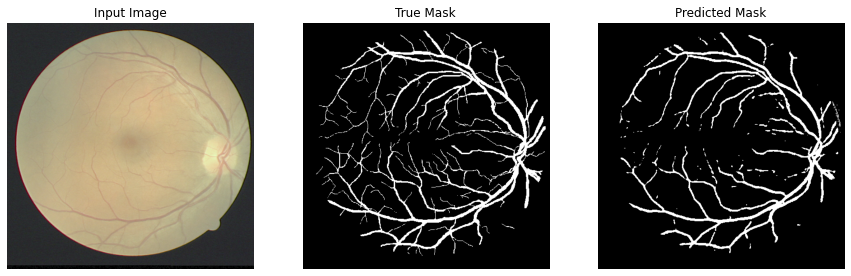


Sample Prediction after epoch 16

Epoch 17/250
14/14 [==============================] - 7s 515ms/step - loss: 0.1934 - dice_coefficient: 0.4338 - accuracy: 0.9583 - val_loss: 0.2309 - val_dice_coefficient: 0.3770 - val_accuracy: 0.9571

Epoch 00017: val_loss improved from 0.23807 to 0.23088, saving model to /kaggle/Models/model7.h5
Epoch 18/250
14/14 [==============================] - 7s 518ms/step - loss: 0.1877 - dice_coefficient: 0.4407 - accuracy: 0.9589 - val_loss: 0.2111 - val_dice_coefficient: 0.3801 - val_accuracy: 0.9584

Epoch 00018: val_loss improved from 0.23088 to 0.21110, saving model to /kaggle/Models/model7.h5
Epoch 19/250
14/14 [==============================] - 7s 518ms/step - loss: 0.1915 - dice_coefficient: 0.4374 - accuracy: 0.9564 - val_loss: 0.2015 - val_dice_coefficient: 0.4045 - val_accuracy: 0.9573

Epoch 00019: val_loss improved from 0.21110 to 0.20151, saving model to /kaggle/Models/model7.h5
Epoch 20/250
14/14 [==============================] - 7s 516ms/st

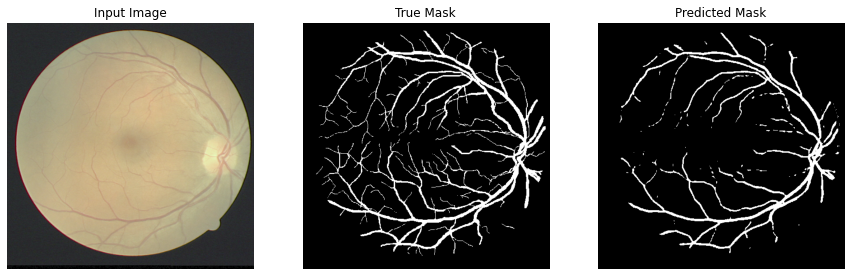


Sample Prediction after epoch 21

Epoch 22/250
14/14 [==============================] - 7s 518ms/step - loss: 0.1701 - dice_coefficient: 0.4721 - accuracy: 0.9599 - val_loss: 0.1889 - val_dice_coefficient: 0.3877 - val_accuracy: 0.9582

Epoch 00022: val_loss improved from 0.19134 to 0.18895, saving model to /kaggle/Models/model7.h5
Epoch 23/250
14/14 [==============================] - 7s 517ms/step - loss: 0.1653 - dice_coefficient: 0.4802 - accuracy: 0.9605 - val_loss: 0.1824 - val_dice_coefficient: 0.4236 - val_accuracy: 0.9610

Epoch 00023: val_loss improved from 0.18895 to 0.18240, saving model to /kaggle/Models/model7.h5
Epoch 24/250
14/14 [==============================] - 7s 518ms/step - loss: 0.1611 - dice_coefficient: 0.4879 - accuracy: 0.9610 - val_loss: 0.1765 - val_dice_coefficient: 0.4147 - val_accuracy: 0.9600

Epoch 00024: val_loss improved from 0.18240 to 0.17655, saving model to /kaggle/Models/model7.h5
Epoch 25/250
14/14 [==============================] - 7s 517ms/st

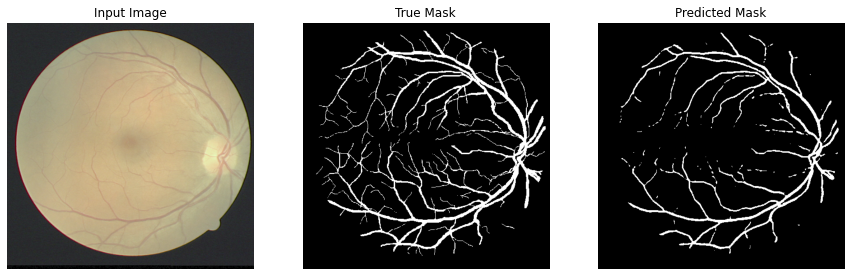


Sample Prediction after epoch 26

Epoch 27/250
14/14 [==============================] - 7s 518ms/step - loss: 0.1505 - dice_coefficient: 0.5094 - accuracy: 0.9621 - val_loss: 0.1645 - val_dice_coefficient: 0.4390 - val_accuracy: 0.9608

Epoch 00027: val_loss improved from 0.17035 to 0.16451, saving model to /kaggle/Models/model7.h5
Epoch 28/250
14/14 [==============================] - 7s 518ms/step - loss: 0.1476 - dice_coefficient: 0.5155 - accuracy: 0.9622 - val_loss: 0.1624 - val_dice_coefficient: 0.4382 - val_accuracy: 0.9596

Epoch 00028: val_loss improved from 0.16451 to 0.16241, saving model to /kaggle/Models/model7.h5
Epoch 29/250
14/14 [==============================] - 7s 522ms/step - loss: 0.1449 - dice_coefficient: 0.5214 - accuracy: 0.9625 - val_loss: 0.1573 - val_dice_coefficient: 0.4597 - val_accuracy: 0.9611

Epoch 00029: val_loss improved from 0.16241 to 0.15732, saving model to /kaggle/Models/model7.h5
Epoch 30/250
14/14 [==============================] - 7s 519ms/st

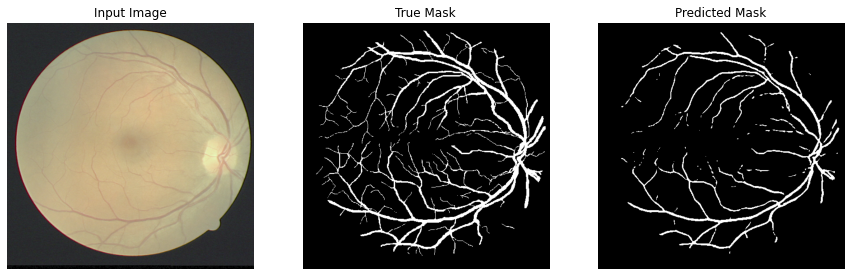


Sample Prediction after epoch 31

Epoch 32/250
14/14 [==============================] - 7s 516ms/step - loss: 0.1365 - dice_coefficient: 0.5411 - accuracy: 0.9635 - val_loss: 0.1514 - val_dice_coefficient: 0.4610 - val_accuracy: 0.9600

Epoch 00032: val_loss improved from 0.15181 to 0.15136, saving model to /kaggle/Models/model7.h5
Epoch 33/250
14/14 [==============================] - 7s 518ms/step - loss: 0.1337 - dice_coefficient: 0.5477 - accuracy: 0.9639 - val_loss: 0.1488 - val_dice_coefficient: 0.4670 - val_accuracy: 0.9598

Epoch 00033: val_loss improved from 0.15136 to 0.14884, saving model to /kaggle/Models/model7.h5
Epoch 34/250
14/14 [==============================] - 7s 518ms/step - loss: 0.1315 - dice_coefficient: 0.5533 - accuracy: 0.9642 - val_loss: 0.1436 - val_dice_coefficient: 0.4868 - val_accuracy: 0.9612

Epoch 00034: val_loss improved from 0.14884 to 0.14363, saving model to /kaggle/Models/model7.h5
Epoch 35/250
14/14 [==============================] - 7s 514ms/st

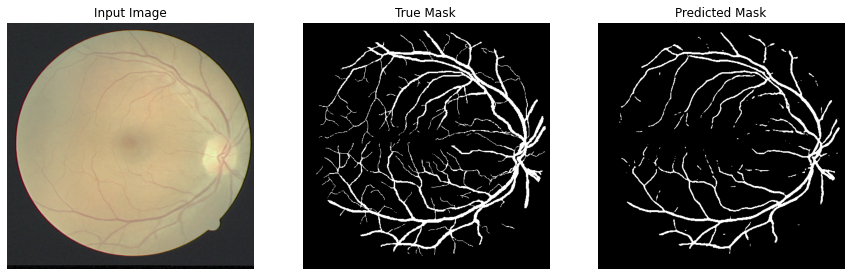


Sample Prediction after epoch 36

Epoch 37/250
14/14 [==============================] - 7s 515ms/step - loss: 0.1251 - dice_coefficient: 0.5697 - accuracy: 0.9650 - val_loss: 0.1334 - val_dice_coefficient: 0.5132 - val_accuracy: 0.9621

Epoch 00037: val_loss improved from 0.13975 to 0.13340, saving model to /kaggle/Models/model7.h5
Epoch 38/250
14/14 [==============================] - 7s 518ms/step - loss: 0.1227 - dice_coefficient: 0.5763 - accuracy: 0.9654 - val_loss: 0.1327 - val_dice_coefficient: 0.5222 - val_accuracy: 0.9626

Epoch 00038: val_loss improved from 0.13340 to 0.13265, saving model to /kaggle/Models/model7.h5
Epoch 39/250
14/14 [==============================] - 7s 518ms/step - loss: 0.1206 - dice_coefficient: 0.5823 - accuracy: 0.9657 - val_loss: 0.1327 - val_dice_coefficient: 0.5212 - val_accuracy: 0.9621

Epoch 00039: val_loss did not improve from 0.13265
Epoch 40/250
14/14 [==============================] - 7s 518ms/step - loss: 0.1189 - dice_coefficient: 0.5871 -

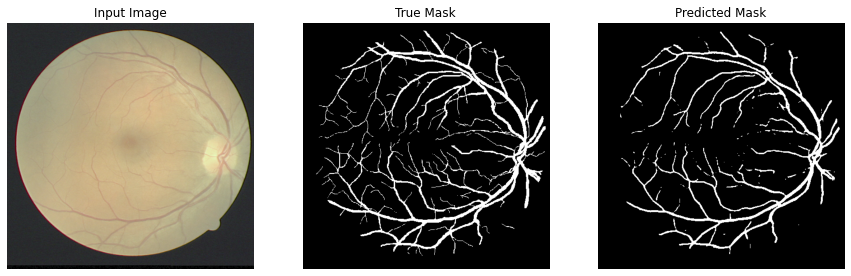


Sample Prediction after epoch 41

Epoch 42/250
14/14 [==============================] - 7s 517ms/step - loss: 0.1157 - dice_coefficient: 0.5966 - accuracy: 0.9662 - val_loss: 0.1287 - val_dice_coefficient: 0.5360 - val_accuracy: 0.9624

Epoch 00042: val_loss improved from 0.12987 to 0.12872, saving model to /kaggle/Models/model7.h5
Epoch 43/250
14/14 [==============================] - 7s 516ms/step - loss: 0.1139 - dice_coefficient: 0.6011 - accuracy: 0.9665 - val_loss: 0.1292 - val_dice_coefficient: 0.5422 - val_accuracy: 0.9621

Epoch 00043: val_loss did not improve from 0.12872
Epoch 44/250
14/14 [==============================] - 7s 517ms/step - loss: 0.1121 - dice_coefficient: 0.6064 - accuracy: 0.9669 - val_loss: 0.1296 - val_dice_coefficient: 0.5337 - val_accuracy: 0.9611

Epoch 00044: val_loss did not improve from 0.12872
Epoch 45/250
14/14 [==============================] - 7s 517ms/step - loss: 0.1107 - dice_coefficient: 0.6113 - accuracy: 0.9670 - val_loss: 0.1282 - val_dic

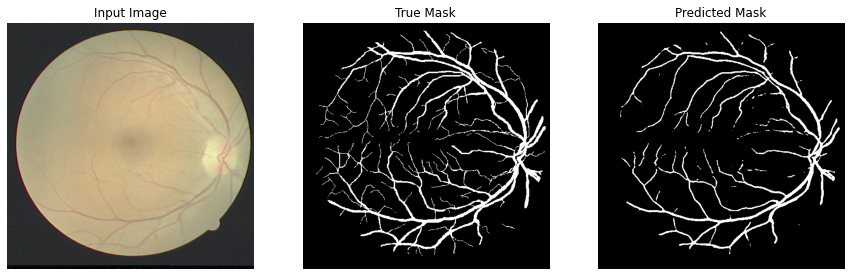


Sample Prediction after epoch 46

Epoch 47/250
14/14 [==============================] - 7s 518ms/step - loss: 0.1084 - dice_coefficient: 0.6183 - accuracy: 0.9672 - val_loss: 0.1266 - val_dice_coefficient: 0.5415 - val_accuracy: 0.9606

Epoch 00047: val_loss did not improve from 0.12530
Epoch 48/250
14/14 [==============================] - 7s 516ms/step - loss: 0.1068 - dice_coefficient: 0.6239 - accuracy: 0.9676 - val_loss: 0.1257 - val_dice_coefficient: 0.5511 - val_accuracy: 0.9615

Epoch 00048: val_loss did not improve from 0.12530
Epoch 49/250
14/14 [==============================] - 7s 517ms/step - loss: 0.1049 - dice_coefficient: 0.6284 - accuracy: 0.9679 - val_loss: 0.1209 - val_dice_coefficient: 0.5687 - val_accuracy: 0.9629

Epoch 00049: val_loss improved from 0.12530 to 0.12088, saving model to /kaggle/Models/model7.h5
Epoch 50/250
14/14 [==============================] - 7s 517ms/step - loss: 0.1031 - dice_coefficient: 0.6334 - accuracy: 0.9684 - val_loss: 0.1224 - val_dic

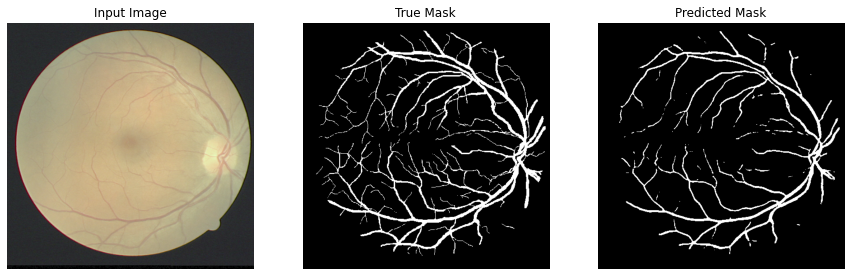


Sample Prediction after epoch 51

Epoch 52/250
14/14 [==============================] - 7s 516ms/step - loss: 0.1009 - dice_coefficient: 0.6415 - accuracy: 0.9686 - val_loss: 0.1217 - val_dice_coefficient: 0.5642 - val_accuracy: 0.9616

Epoch 00052: val_loss did not improve from 0.12088
Epoch 53/250
14/14 [==============================] - 7s 516ms/step - loss: 0.0997 - dice_coefficient: 0.6448 - accuracy: 0.9688 - val_loss: 0.1210 - val_dice_coefficient: 0.5765 - val_accuracy: 0.9623

Epoch 00053: val_loss did not improve from 0.12088
Epoch 54/250
14/14 [==============================] - 7s 516ms/step - loss: 0.0983 - dice_coefficient: 0.6485 - accuracy: 0.9691 - val_loss: 0.1184 - val_dice_coefficient: 0.5840 - val_accuracy: 0.9621

Epoch 00054: val_loss improved from 0.12088 to 0.11840, saving model to /kaggle/Models/model7.h5
Epoch 55/250
14/14 [==============================] - 7s 516ms/step - loss: 0.0973 - dice_coefficient: 0.6525 - accuracy: 0.9692 - val_loss: 0.1214 - val_dic

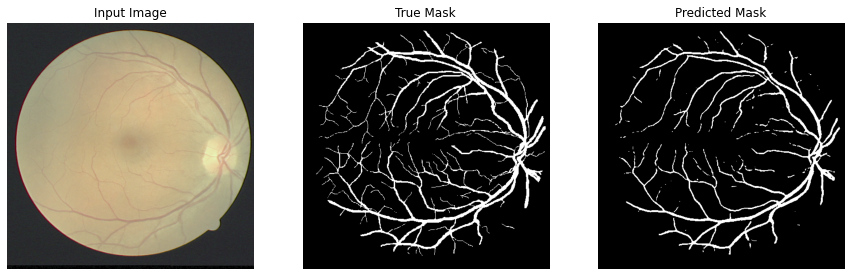


Sample Prediction after epoch 56

Epoch 57/250
14/14 [==============================] - 7s 519ms/step - loss: 0.0954 - dice_coefficient: 0.6588 - accuracy: 0.9695 - val_loss: 0.1167 - val_dice_coefficient: 0.5905 - val_accuracy: 0.9622

Epoch 00057: val_loss did not improve from 0.11600
Epoch 58/250
14/14 [==============================] - 7s 518ms/step - loss: 0.0938 - dice_coefficient: 0.6632 - accuracy: 0.9699 - val_loss: 0.1161 - val_dice_coefficient: 0.5951 - val_accuracy: 0.9624

Epoch 00058: val_loss did not improve from 0.11600
Epoch 59/250
14/14 [==============================] - 7s 518ms/step - loss: 0.0929 - dice_coefficient: 0.6667 - accuracy: 0.9700 - val_loss: 0.1159 - val_dice_coefficient: 0.5883 - val_accuracy: 0.9619

Epoch 00059: val_loss improved from 0.11600 to 0.11593, saving model to /kaggle/Models/model7.h5
Epoch 60/250
14/14 [==============================] - 7s 520ms/step - loss: 0.0920 - dice_coefficient: 0.6698 - accuracy: 0.9702 - val_loss: 0.1126 - val_dic

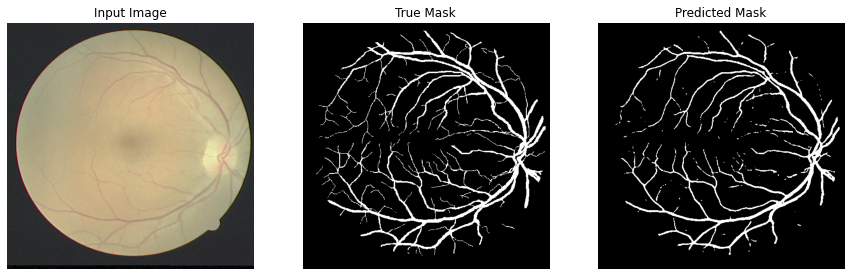


Sample Prediction after epoch 61

Epoch 62/250
14/14 [==============================] - 7s 517ms/step - loss: 0.0900 - dice_coefficient: 0.6762 - accuracy: 0.9706 - val_loss: 0.1114 - val_dice_coefficient: 0.6107 - val_accuracy: 0.9633

Epoch 00062: val_loss did not improve from 0.10894
Epoch 63/250
14/14 [==============================] - 7s 517ms/step - loss: 0.0892 - dice_coefficient: 0.6795 - accuracy: 0.9707 - val_loss: 0.1095 - val_dice_coefficient: 0.6153 - val_accuracy: 0.9639

Epoch 00063: val_loss did not improve from 0.10894
Epoch 64/250
14/14 [==============================] - 7s 518ms/step - loss: 0.0882 - dice_coefficient: 0.6824 - accuracy: 0.9709 - val_loss: 0.1102 - val_dice_coefficient: 0.6207 - val_accuracy: 0.9636

Epoch 00064: val_loss did not improve from 0.10894
Epoch 65/250
14/14 [==============================] - 7s 517ms/step - loss: 0.0869 - dice_coefficient: 0.6860 - accuracy: 0.9713 - val_loss: 0.1098 - val_dice_coefficient: 0.6259 - val_accuracy: 0.9638



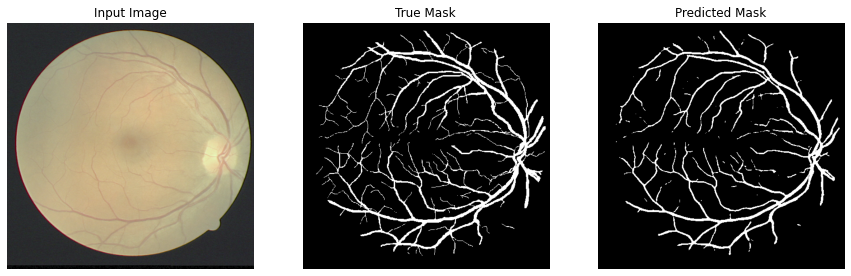


Sample Prediction after epoch 66

Epoch 67/250
14/14 [==============================] - 7s 519ms/step - loss: 0.0845 - dice_coefficient: 0.6935 - accuracy: 0.9719 - val_loss: 0.1109 - val_dice_coefficient: 0.6226 - val_accuracy: 0.9632

Epoch 00067: val_loss did not improve from 0.10814
Epoch 68/250
14/14 [==============================] - 7s 519ms/step - loss: 0.0833 - dice_coefficient: 0.6967 - accuracy: 0.9722 - val_loss: 0.1079 - val_dice_coefficient: 0.6339 - val_accuracy: 0.9640

Epoch 00068: val_loss improved from 0.10814 to 0.10788, saving model to /kaggle/Models/model7.h5
Epoch 69/250
14/14 [==============================] - 7s 517ms/step - loss: 0.0828 - dice_coefficient: 0.6992 - accuracy: 0.9722 - val_loss: 0.1060 - val_dice_coefficient: 0.6359 - val_accuracy: 0.9644

Epoch 00069: val_loss improved from 0.10788 to 0.10595, saving model to /kaggle/Models/model7.h5
Epoch 70/250
14/14 [==============================] - 7s 519ms/step - loss: 0.0821 - dice_coefficient: 0.7014 -

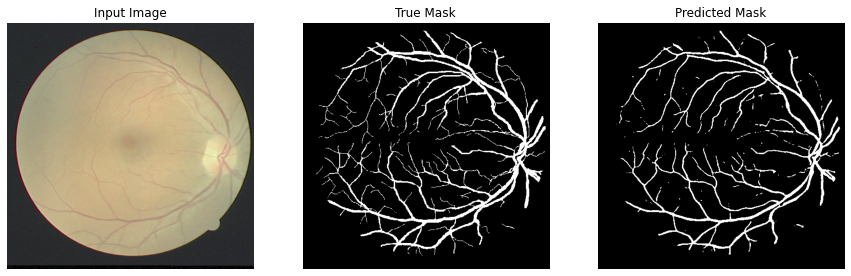


Sample Prediction after epoch 71

Epoch 72/250
14/14 [==============================] - 7s 517ms/step - loss: 0.0796 - dice_coefficient: 0.7089 - accuracy: 0.9731 - val_loss: 0.1080 - val_dice_coefficient: 0.6294 - val_accuracy: 0.9632

Epoch 00072: val_loss did not improve from 0.10528
Epoch 73/250
14/14 [==============================] - 7s 521ms/step - loss: 0.0774 - dice_coefficient: 0.7172 - accuracy: 0.9734 - val_loss: 0.1046 - val_dice_coefficient: 0.6530 - val_accuracy: 0.9640

Epoch 00076: val_loss improved from 0.10528 to 0.10463, saving model to /kaggle/Models/model7.h5


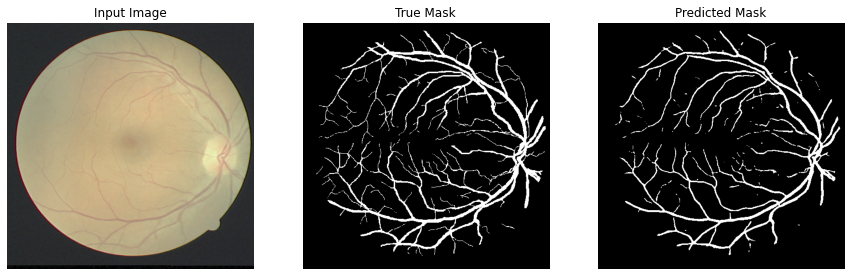


Sample Prediction after epoch 76

Epoch 77/250
14/14 [==============================] - 7s 518ms/step - loss: 0.0766 - dice_coefficient: 0.7202 - accuracy: 0.9736 - val_loss: 0.1060 - val_dice_coefficient: 0.6417 - val_accuracy: 0.9633

Epoch 00077: val_loss did not improve from 0.10463
Epoch 78/250
14/14 [==============================] - 7s 518ms/step - loss: 0.0756 - dice_coefficient: 0.7230 - accuracy: 0.9740 - val_loss: 0.1056 - val_dice_coefficient: 0.6489 - val_accuracy: 0.9636

Epoch 00078: val_loss did not improve from 0.10463
Epoch 79/250
14/14 [==============================] - 7s 518ms/step - loss: 0.0746 - dice_coefficient: 0.7257 - accuracy: 0.9742 - val_loss: 0.1055 - val_dice_coefficient: 0.6554 - val_accuracy: 0.9638

Epoch 00079: val_loss did not improve from 0.10463
Epoch 80/250
14/14 [==============================] - 7s 519ms/step - loss: 0.0744 - dice_coefficient: 0.7280 - accuracy: 0.9742 - val_loss: 0.1057 - val_dice_coefficient: 0.6456 - val_accuracy: 0.9634



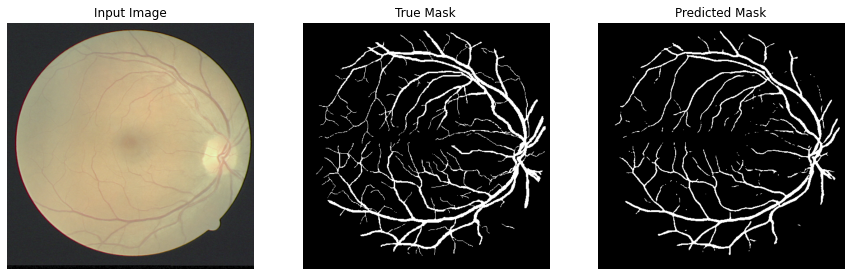


Sample Prediction after epoch 81

Epoch 82/250
14/14 [==============================] - 7s 518ms/step - loss: 0.0734 - dice_coefficient: 0.7313 - accuracy: 0.9744 - val_loss: 0.1062 - val_dice_coefficient: 0.6579 - val_accuracy: 0.9635

Epoch 00082: val_loss did not improve from 0.10425
Epoch 83/250
14/14 [==============================] - 7s 521ms/step - loss: 0.0723 - dice_coefficient: 0.7347 - accuracy: 0.9747 - val_loss: 0.1065 - val_dice_coefficient: 0.6464 - val_accuracy: 0.9631

Epoch 00083: val_loss did not improve from 0.10425
Epoch 84/250
14/14 [==============================] - 7s 518ms/step - loss: 0.0714 - dice_coefficient: 0.7372 - accuracy: 0.9750 - val_loss: 0.1073 - val_dice_coefficient: 0.6430 - val_accuracy: 0.9629

Epoch 00084: val_loss did not improve from 0.10425
Epoch 85/250
14/14 [==============================] - 7s 518ms/step - loss: 0.0710 - dice_coefficient: 0.7394 - accuracy: 0.9751 - val_loss: 0.1047 - val_dice_coefficient: 0.6549 - val_accuracy: 0.9633



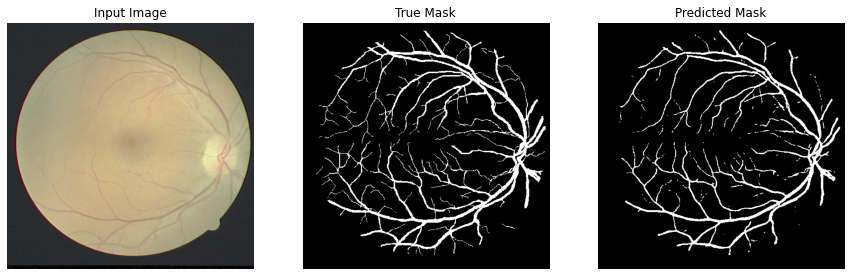


Sample Prediction after epoch 86

Epoch 87/250
14/14 [==============================] - 7s 518ms/step - loss: 0.0706 - dice_coefficient: 0.7418 - accuracy: 0.9750 - val_loss: 0.1047 - val_dice_coefficient: 0.6627 - val_accuracy: 0.9639

Epoch 00087: val_loss did not improve from 0.10419
Epoch 88/250
14/14 [==============================] - 7s 518ms/step - loss: 0.0701 - dice_coefficient: 0.7434 - accuracy: 0.9752 - val_loss: 0.1056 - val_dice_coefficient: 0.6617 - val_accuracy: 0.9633

Epoch 00088: val_loss did not improve from 0.10419
Epoch 89/250
14/14 [==============================] - 7s 519ms/step - loss: 0.0702 - dice_coefficient: 0.7445 - accuracy: 0.9750 - val_loss: 0.1058 - val_dice_coefficient: 0.6533 - val_accuracy: 0.9632

Epoch 00089: val_loss did not improve from 0.10419
Epoch 90/250
14/14 [==============================] - 7s 519ms/step - loss: 0.0700 - dice_coefficient: 0.7450 - accuracy: 0.9749 - val_loss: 0.1097 - val_dice_coefficient: 0.6555 - val_accuracy: 0.9613



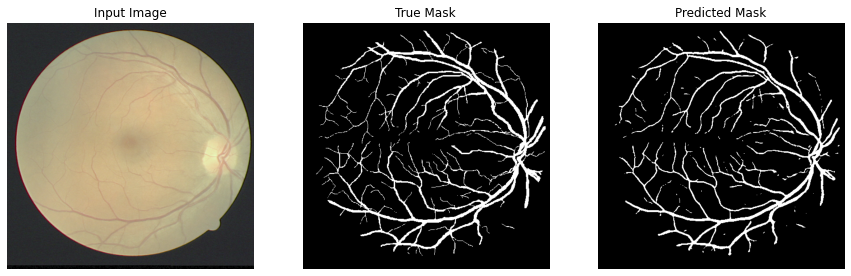


Sample Prediction after epoch 91

Epoch 92/250
14/14 [==============================] - 7s 518ms/step - loss: 0.0680 - dice_coefficient: 0.7507 - accuracy: 0.9756 - val_loss: 0.1047 - val_dice_coefficient: 0.6710 - val_accuracy: 0.9636

Epoch 00092: val_loss did not improve from 0.10419
Epoch 93/250
14/14 [==============================] - 7s 519ms/step - loss: 0.0675 - dice_coefficient: 0.7517 - accuracy: 0.9758 - val_loss: 0.1033 - val_dice_coefficient: 0.6755 - val_accuracy: 0.9637

Epoch 00093: val_loss improved from 0.10419 to 0.10332, saving model to /kaggle/Models/model7.h5
Epoch 94/250
14/14 [==============================] - 7s 519ms/step - loss: 0.0665 - dice_coefficient: 0.7549 - accuracy: 0.9761 - val_loss: 0.1062 - val_dice_coefficient: 0.6789 - val_accuracy: 0.9635

Epoch 00094: val_loss did not improve from 0.10332
Epoch 95/250
14/14 [==============================] - 7s 517ms/step - loss: 0.0659 - dice_coefficient: 0.7571 - accuracy: 0.9762 - val_loss: 0.1069 - val_dic

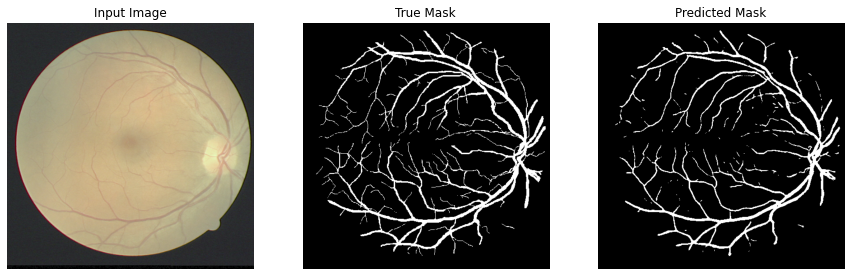


Sample Prediction after epoch 96

Epoch 97/250
14/14 [==============================] - 7s 517ms/step - loss: 0.0661 - dice_coefficient: 0.7589 - accuracy: 0.9760 - val_loss: 0.1039 - val_dice_coefficient: 0.6791 - val_accuracy: 0.9638

Epoch 00097: val_loss did not improve from 0.10332
Epoch 98/250
14/14 [==============================] - 7s 519ms/step - loss: 0.0660 - dice_coefficient: 0.7592 - accuracy: 0.9759 - val_loss: 0.1062 - val_dice_coefficient: 0.6741 - val_accuracy: 0.9632

Epoch 00098: val_loss did not improve from 0.10332
Epoch 99/250
14/14 [==============================] - 7s 520ms/step - loss: 0.0642 - dice_coefficient: 0.7632 - accuracy: 0.9767 - val_loss: 0.1083 - val_dice_coefficient: 0.6844 - val_accuracy: 0.9630

Epoch 00099: val_loss did not improve from 0.10332
Epoch 100/250
14/14 [==============================] - 7s 521ms/step - loss: 0.0631 - dice_coefficient: 0.7663 - accuracy: 0.9771 - val_loss: 0.1063 - val_dice_coefficient: 0.6857 - val_accuracy: 0.9632


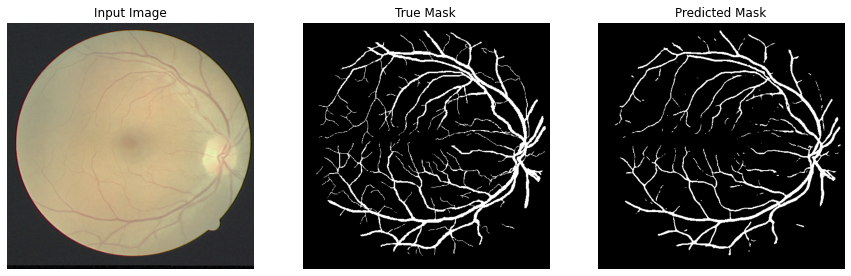


Sample Prediction after epoch 101

Epoch 102/250
14/14 [==============================] - 7s 518ms/step - loss: 0.0620 - dice_coefficient: 0.7702 - accuracy: 0.9774 - val_loss: 0.1059 - val_dice_coefficient: 0.6798 - val_accuracy: 0.9636

Epoch 00102: val_loss did not improve from 0.10315
Epoch 103/250
14/14 [==============================] - 7s 519ms/step - loss: 0.0618 - dice_coefficient: 0.7721 - accuracy: 0.9774 - val_loss: 0.1079 - val_dice_coefficient: 0.6796 - val_accuracy: 0.9629

Epoch 00103: val_loss did not improve from 0.10315
Epoch 104/250
14/14 [==============================] - 7s 519ms/step - loss: 0.0614 - dice_coefficient: 0.7732 - accuracy: 0.9775 - val_loss: 0.1086 - val_dice_coefficient: 0.6826 - val_accuracy: 0.9630

Epoch 00104: val_loss did not improve from 0.10315
Epoch 105/250
14/14 [==============================] - 7s 519ms/step - loss: 0.0616 - dice_coefficient: 0.7734 - accuracy: 0.9773 - val_loss: 0.1064 - val_dice_coefficient: 0.6863 - val_accuracy: 0.9

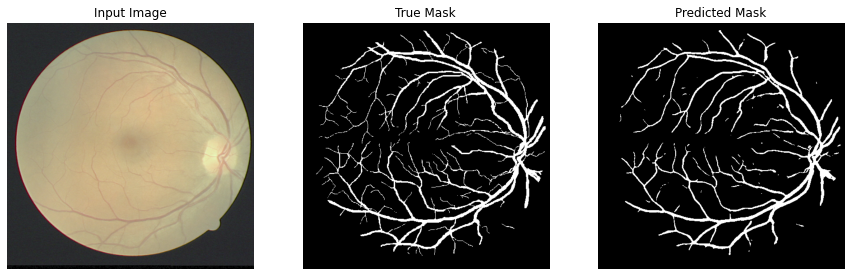


Sample Prediction after epoch 106

Epoch 107/250
14/14 [==============================] - 7s 518ms/step - loss: 0.0619 - dice_coefficient: 0.7739 - accuracy: 0.9770 - val_loss: 0.1084 - val_dice_coefficient: 0.6922 - val_accuracy: 0.9632

Epoch 00107: val_loss did not improve from 0.10315
Epoch 108/250
14/14 [==============================] - 7s 517ms/step - loss: 0.0618 - dice_coefficient: 0.7744 - accuracy: 0.9769 - val_loss: 0.1050 - val_dice_coefficient: 0.6994 - val_accuracy: 0.9640

Epoch 00108: val_loss did not improve from 0.10315
Epoch 109/250
14/14 [==============================] - 7s 516ms/step - loss: 0.0606 - dice_coefficient: 0.7769 - accuracy: 0.9775 - val_loss: 0.1051 - val_dice_coefficient: 0.7001 - val_accuracy: 0.9636

Epoch 00109: val_loss did not improve from 0.10315
Epoch 110/250
14/14 [==============================] - 7s 519ms/step - loss: 0.0596 - dice_coefficient: 0.7797 - accuracy: 0.9779 - val_loss: 0.1069 - val_dice_coefficient: 0.7040 - val_accuracy: 0.9

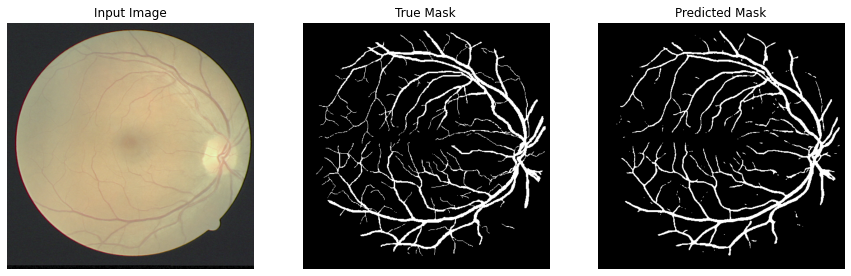


Sample Prediction after epoch 111

Epoch 00111: early stopping


In [226]:
from tensorflow.keras.metrics import MeanIoU

# Define a function to calculate the Dice coefficient
def dice_coefficient(y_true, y_pred):
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    return (2.0 * intersection + 1e-5) / (union + 1e-5)


# define optomizer
optim = keras.optimizers.Adam(0.0001)
bce   = keras.losses.BinaryCrossentropy()
metrics = [dice_coefficient, "accuracy"]

# compile keras model with defined optimozer, loss and metrics
model7.compile(optim, bce, metrics)


history = model7.fit(
    train_dataset,
    epochs=250,
    validation_data=validation_dataset,
    callbacks=[checkpoint_callback, early_stopping_callback, display_callback]
)

In [227]:
test_data = '/kaggle/input/dataset/new_data/new_data/test/image'
test_images = sorted(
    [
        os.path.join(test_data, fname)
        for fname in os.listdir(test_data)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)

test_images

['/kaggle/input/dataset/new_data/new_data/test/image/01_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/02_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/03_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/04_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/05_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/06_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/07_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/08_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/09_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/10_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/11_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/12_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/13_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/14_test.tif',
 '/kaggle/input/dataset/new_data/new_data/test/image/15_test.t

In [228]:
test_mask = '/kaggle/input/dataset/new_data/new_data/test/mask'
test_masks = sorted(
    [
        os.path.join(test_mask, fname)
        for fname in os.listdir(test_mask)
        if fname.endswith(exts) and not fname.startswith(".")
    ]
)
test_masks

['/kaggle/input/dataset/new_data/new_data/test/mask/01_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/02_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/03_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/04_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/05_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/06_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/07_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/08_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/09_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/10_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/11_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/12_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/13_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/14_test.gif',
 '/kaggle/input/dataset/new_data/new_data/test/mask/15_test.gif',
 '/kaggle/

In [229]:
print("Number of samples:", len(test_images), len(test_masks))
for test_path, mask_path in zip(test_images[:10], test_masks[:10]):
    print(test_path[-31:], "|", mask_path[-34:])

Number of samples: 20 20
new_data/test/image/01_test.tif | ata/new_data/test/mask/01_test.gif
new_data/test/image/02_test.tif | ata/new_data/test/mask/02_test.gif
new_data/test/image/03_test.tif | ata/new_data/test/mask/03_test.gif
new_data/test/image/04_test.tif | ata/new_data/test/mask/04_test.gif
new_data/test/image/05_test.tif | ata/new_data/test/mask/05_test.gif
new_data/test/image/06_test.tif | ata/new_data/test/mask/06_test.gif
new_data/test/image/07_test.tif | ata/new_data/test/mask/07_test.gif
new_data/test/image/08_test.tif | ata/new_data/test/mask/08_test.gif
new_data/test/image/09_test.tif | ata/new_data/test/mask/09_test.gif
new_data/test/image/10_test.tif | ata/new_data/test/mask/10_test.gif


In [230]:
IMAGE_SIZE = 512
BATCH_SIZE = 8

def read_files(image_path, mask=False):
    image = tf.io.read_file(image_path)
    if mask:
        image = tf.io.decode_gif(image) # out: (1, h, w, 3)
        image = tf.squeeze(image) # out: (h, w, 3)
        image = tf.image.rgb_to_grayscale(image) # out: (h, w, 1)
        image = tf.divide(image, 128)
        image.set_shape([None, None, 1])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = tf.cast(image, tf.int32)
    else:
        image = tfio.experimental.image.decode_tiff(image) # out: (h, w, 4)
        image = image[:,:,:3] # out: (h, w, 3)
        image.set_shape([None, None, 3])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = image / 255.
    return image

def load_data(image_list, mask_list):
    image = read_files(image_list)
    mask  = read_files(mask_list, mask=True)
    return image, mask

def data_generator(image_list, mask_list):
    dataset = tf.data.Dataset.from_tensor_slices((image_list, mask_list))
    dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=False)
    return dataset

test_dataset = data_generator(test_images, test_masks)
test_dataset

<BatchDataset shapes: ((None, 512, 512, 3), (None, 512, 512, 1)), types: (tf.float32, tf.int32)>

In [231]:
valid_dataset = test_dataset

In [232]:
test_masks = np.concatenate([y for x, y in valid_dataset], axis=0)
masks = test_masks.ravel()

In [234]:
test_imgs = np.concatenate([x for x, y in valid_dataset], axis=0)
predictions = model7.predict(test_imgs)
predictions.shape

(20, 512, 512, 1)

In [235]:
y_pred = predictions.ravel()
y_pred = (y_pred > 0.5).astype('int32')
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [236]:
from sklearn.metrics import classification_report
print(classification_report(masks, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98   4784655
           1       0.78      0.80      0.79    458225

    accuracy                           0.96   5242880
   macro avg       0.88      0.89      0.88   5242880
weighted avg       0.96      0.96      0.96   5242880



In [238]:
def jaccard(target, prediction):
    intersection = np.logical_and(target, prediction)
    union = np.logical_or(target, prediction)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score
print('The Jaccard Score is: ', jaccard(y_pred, masks))


The Jaccard Score is:  0.6502607823649383


In [239]:
def my_dice(target, prediction):
 intersection = np.logical_and(target, prediction)
 union = np.logical_or(target, prediction)
 dice = (2*np.sum(intersection))/(np.sum(union)+np.sum(intersection))
 return dice
print('The Dice Score is: ', my_dice(y_pred, masks))

The Dice Score is:  0.7880703332634124


In [240]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(masks, y_pred)
print('The MCC Score is:', mcc)


The MCC Score is: 0.7676097411392118


In [241]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(masks, y_pred)
auc = roc_auc_score(masks, y_pred)

print('The AUC Score is:', auc)


The AUC Score is: 0.8869681412240997


(-0.5, 511.5, 511.5, -0.5)

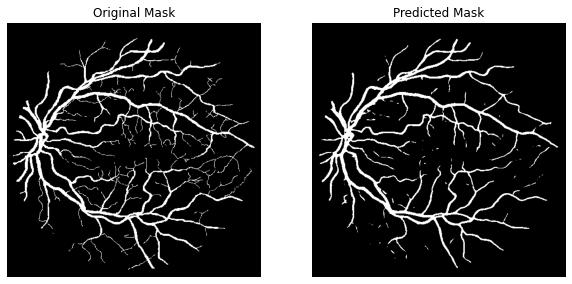

In [242]:
image = test_imgs[4]
mask = test_masks[4]
image = np.expand_dims(image, axis=0)
pred_mask = model7.predict(image)
pred_mask = (pred_mask > 0.5).astype('int32')
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Predicted Mask')
plt.imshow(pred_mask[0], cmap='gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

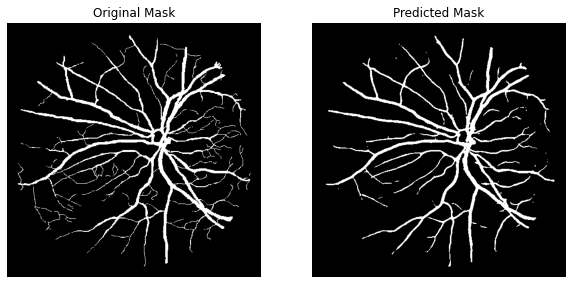

In [243]:
image = test_imgs[3]
mask = test_masks[3]
image = np.expand_dims(image, axis=0)
pred_mask = model7.predict(image)
pred_mask = (pred_mask > 0.5).astype('int32')
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Predicted Mask')
plt.imshow(pred_mask[0], cmap='gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

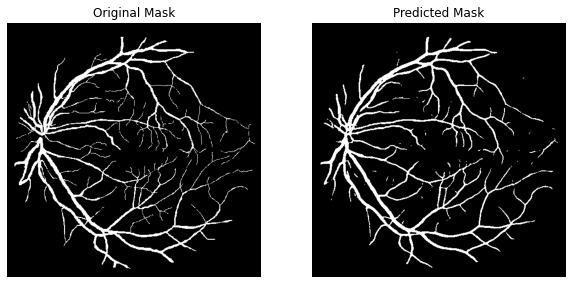

In [244]:
image = test_imgs[11]
mask = test_masks[11]
image = np.expand_dims(image, axis=0)
pred_mask = model7.predict(image)
pred_mask = (pred_mask > 0.5).astype('int32')
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Predicted Mask')
plt.imshow(pred_mask[0], cmap='gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

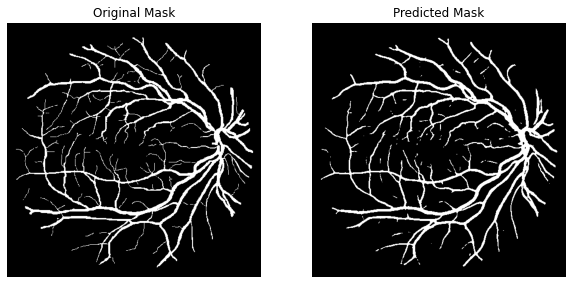

In [245]:
image = test_imgs[1]
mask = test_masks[1]
image = np.expand_dims(image, axis=0)
pred_mask = model7.predict(image)
pred_mask = (pred_mask > 0.5).astype('int32')
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Original Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Predicted Mask')
plt.imshow(pred_mask[0], cmap='gray')
plt.axis('off')